In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
DATADIR = "./version 3.0/yogads"
CATEGORIES= ["bridge", "childs", "downwarddog", "mountain", "plank", "seatedforwardbend", "tree", "trianglepose", "warrior1", "warrior2"]

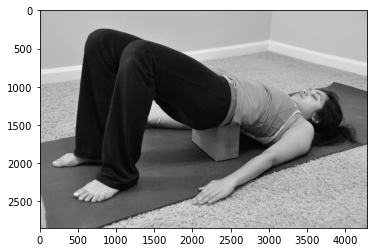

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break  

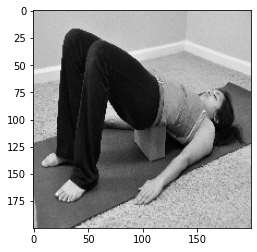

In [4]:
IMG_SIZE = 200 #change img_size to 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= "gray")
plt.show()

In [5]:
#training dataset

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#reading images and storing it in array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))# resizing size of the images
                training_data.append([new_array, class_num])#storing resized images on a dataset with a label
            except Exception as e:
                pass
            
create_training_data()     

In [6]:
import numpy as np
x =[] # feature set
y= [] # label set

for features,label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(x.shape)

(625, 200, 200, 1)


In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(x,y,test_size=0.1)

In [8]:
n_samples, nx, ny, nz = train_data.shape
train_data2 = train_data.reshape((n_samples, nx*ny*nz))

In [9]:
train_data2.shape

(562, 40000)

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10000, random_state = 0)
model.fit(train_data2, train_target)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [37]:
test_data.shape

n_samples, nx, ny, nz = test_data.shape

test_data2 = test_data.reshape((n_samples, nx*ny*nz))

test_data2.shape

(63, 40000)

In [38]:
y_pred = model.predict(test_data2)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(test_target, y_pred)

0.5714285714285714

In [14]:
pickle.dump(model, open('yoga_model.pkl', 'wb'))

## Testing

In [15]:
## Childs
img1 = cv2.imread('./version 3.0/sampleposes1/childs.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
cv2.imshow('image',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img1 = cv2.resize(img1, (IMG_SIZE, IMG_SIZE))
img1 = img1.reshape(IMG_SIZE, IMG_SIZE)
img1 = img1.reshape(1, -1)
res = model.predict(img1)
CATEGORIES[res[0]]

'mountain'

In [17]:
## DownwardDog
img2 = cv2.imread('./version 3.0/sampleposes1/downwarddog.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2, (IMG_SIZE, IMG_SIZE))
img2 = img2.reshape(IMG_SIZE, IMG_SIZE)
img2 = img2.reshape(1, -1)
res = model.predict(img2)
CATEGORIES[res[0]]

'downwarddog'

In [18]:
## mountain
img3 = cv2.imread('./version 3.0/sampleposes1/mountain.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
img3 = cv2.resize(img3, (IMG_SIZE, IMG_SIZE))
img3 = img3.reshape(IMG_SIZE, IMG_SIZE)
img3 = img3.reshape(1, -1)
res = model.predict(img3)
CATEGORIES[res[0]]

'mountain'

In [19]:
## plank
img4 = cv2.imread('./version 3.0/sampleposes1/plank.jpg')
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
img4 = cv2.resize(img4, (IMG_SIZE, IMG_SIZE))
img4 = img4.reshape(IMG_SIZE, IMG_SIZE)
img4 = img4.reshape(1, -1)
res = model.predict(img4)
CATEGORIES[res[0]]

'trianglepose'

In [20]:
## tree
img5 = cv2.imread('./version 3.0/sampleposes1/tree.jpg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
img5 = cv2.resize(img5, (IMG_SIZE, IMG_SIZE))
img5 = img5.reshape(IMG_SIZE, IMG_SIZE)
img5 = img5.reshape(1, -1)
res = model.predict(img5)
CATEGORIES[res[0]]

'downwarddog'

In [21]:
## trianglepose
img6 = cv2.imread('./version 3.0/sampleposes1/trianglepose.jpg')
img6 = cv2.cvtColor(img6, cv2.COLOR_BGR2GRAY)
img6 = cv2.resize(img6, (IMG_SIZE, IMG_SIZE))
img6 = img6.reshape(IMG_SIZE, IMG_SIZE)
img6 = img6.reshape(1, -1)
res = model.predict(img6)
CATEGORIES[res[0]]

'downwarddog'

In [22]:
## warrior1
img7 = cv2.imread('./version 3.0/sampleposes1/warrior1.jpg')
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)
img7 = cv2.resize(img7, (IMG_SIZE, IMG_SIZE))
img7 = img7.reshape(IMG_SIZE, IMG_SIZE)
img7 = img7.reshape(1, -1)
res = model.predict(img7)
CATEGORIES[res[0]]

'warrior1'

In [23]:
## warrior2
img8 = cv2.imread('./version 3.0/sampleposes1/warrior2.jpg')
img8 = cv2.cvtColor(img8, cv2.COLOR_BGR2GRAY)
img8 = cv2.resize(img8, (IMG_SIZE, IMG_SIZE))
img8 = img8.reshape(IMG_SIZE, IMG_SIZE)
img8 = img8.reshape(1, -1)
res = model.predict(img8)
CATEGORIES[res[0]]

'warrior1'

# Probalities of classes

In [35]:
res = model.predict_proba(img7)
res[0]
val = max(res[0])
val

0.35187999999999997

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


svc = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True, C=50))
svc.fit(train_data2, train_target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=50, gamma='auto', probability=True))])

In [46]:
y_pred = svc.predict(test_data2)
accuracy_score(test_target, y_pred)

0.6190476190476191

In [47]:
res = svc.predict_proba(img7)
res[0]
val = max(res[0])
val

0.5984203081822804

In [48]:
pickle.dump(svc, open('yoga_model.pkl', 'wb'))

In [49]:
from joblib import dump

In [50]:
dump(svc, filename='yoga_model.joblib')

['yoga_model.joblib']

In [51]:
from joblib import load
pmodel = load('yoga_model.joblib')

In [52]:
res = pmodel.predict(img7)
res[0]

8